In [2]:
import pandas as pd

df = pd.read_excel('../data/dataset_churn.xlsx')

df['renda anual'] = (df['renda anual'] >= 80000).astype(int)

df['valor do premio'] = (df['valor do premio'] >= 500).astype(int)

df['tempo de contrato'] = (df['tempo de contrato'] >= 7 ).astype(int)

df['sinistros'] =  (df['sinistros'] >= 1).astype(int)

df['pagamento atrasado'] = (df['pagamento atrasado'] >= 3).astype(int)

df['nivel de satisfacao'] = (df['nivel de satisfacao']>=4).astype(int)

df = df.replace({
    'Intermediário': 1,
    'Premium':1,
    'Básico':0
    })

df = df.replace({
    'Alta': 1,
    'Média':1,
    'Baixa':0
    })

var = [
    'age', 
    'renda anual', 
    'valor do premio', 
    'tempo de contrato',
    'sinistros', 
    'dependentes',
    'cobertura',
    'frequencia de contrato',
    'pagamento atrasado',
    'nivel de satisfacao']

df_analise = df[var].copy()
df_analise['churn'] = df['churn'].copy()

C:\Users\joao_\AppData\Local\Temp\ipykernel_5364\3897010650.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({
C:\Users\joao_\AppData\Local\Temp\ipykernel_5364\3897010650.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({


In [6]:
from sklearn import tree
from sklearn import linear_model
from sklearn import naive_bayes

# Ajuste de modelos

arvore = tree.DecisionTreeClassifier()
logistica = linear_model.LogisticRegression(fit_intercept=True, max_iter=1000)
naive = naive_bayes.GaussianNB()

tabelax = df_analise.columns[:-1]

X = df_analise[tabelax]
y = df_analise['churn']

arvore.fit(X, y)
logistica.fit(X, y)
naive.fit(X, y)

# Criando o Dataframe de previsão
df_predict = df_analise[['churn']]

# Previsões
df_predict['arvore'] = arvore.predict(X)
df_predict['logistica'] = logistica.predict(X)
df_predict['naive'] = naive.predict(X)

# Previsões probabilisticas
df_predict['arvore_probas'] = arvore.predict_proba(X)[:, 1]
df_predict['logistica_probas'] = logistica.predict_proba(X)[:, 1]
df_predict['naive_probas'] = naive.predict_proba(X)[:, 1]

C:\Users\joao_\AppData\Local\Temp\ipykernel_5364\1429477914.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict['arvore'] = arvore.predict(X)
C:\Users\joao_\AppData\Local\Temp\ipykernel_5364\1429477914.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict['logistica'] = logistica.predict(X)
C:\Users\joao_\AppData\Local\Temp\ipykernel_5364\1429477914.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

AUC ROC para Decision Tree: 1.00
AUC ROC para Logistic Regression: 0.86
AUC ROC para Gaussian Naive Bayes: 0.86


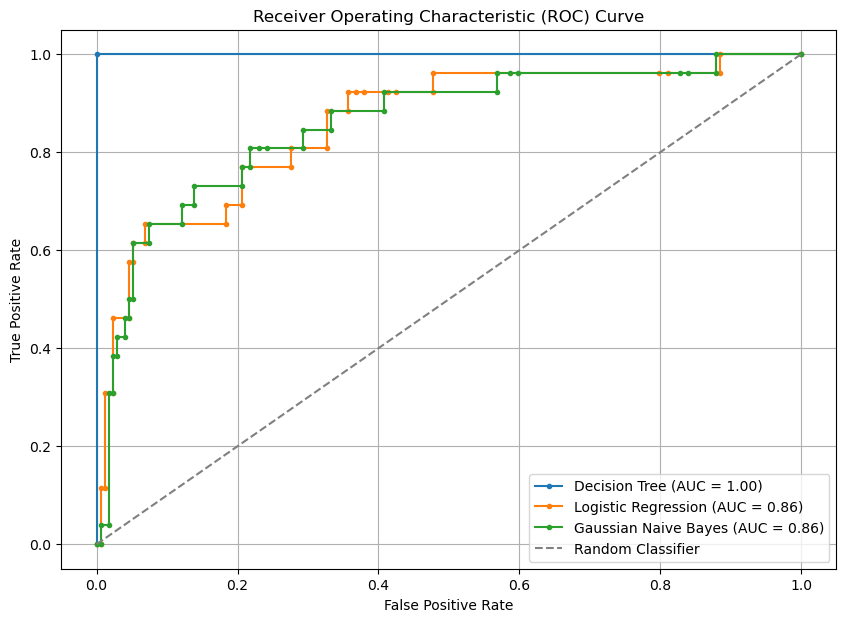

In [7]:
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd

# Calculo da curva ROC
arvore_roc = metrics.roc_curve(df_predict['churn'], df_predict['arvore_probas'])
logistica_roc = metrics.roc_curve(df_predict['churn'], df_predict['logistica_probas'])
naive_roc = metrics.roc_curve(df_predict['churn'], df_predict['naive_probas'])

# Calculo da AUC ROC
arvore_roc_auc = metrics.roc_auc_score(df_predict['churn'], df_predict['arvore_probas'])
logistica_roc_auc = metrics.roc_auc_score(df_predict['churn'], df_predict['logistica_probas'])
naive_roc_auc = metrics.roc_auc_score(df_predict['churn'], df_predict['naive_probas'])

# Print AUC scores
print(f"AUC ROC para Decision Tree: {arvore_roc_auc:.2f}")
print(f"AUC ROC para Logistic Regression: {logistica_roc_auc:.2f}")
print(f"AUC ROC para Gaussian Naive Bayes: {naive_roc_auc:.2f}")

# Criando gráfico
plt.figure(figsize=(10, 7))
plt.plot(arvore_roc[0], arvore_roc[1], marker='.', label=f'Decision Tree (AUC = {arvore_roc_auc:.2f})')
plt.plot(logistica_roc[0], logistica_roc[1], marker='.', label=f'Logistic Regression (AUC = {logistica_roc_auc:.2f})')
plt.plot(naive_roc[0], naive_roc[1], marker='.', label=f'Gaussian Naive Bayes (AUC = {naive_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Classifier')

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()